# En este ejercicio, aprenderemos a normalizar datos.

 <div class="alert alert-block alert-info">
Buena parte del esfuerzo de un proyecto de machine learning no es optimizar el modelo, sino en mejorar y limpiar los datos. 
<br>
Mas datos suelen ser mejor que un modelo mas optimizado
<br>
</div>

Vamos a cargar un dataset con datos incompletos y sin normalizar, y vamos a normalizar los datos, rellenando los incompletos, para poder generar un modelo de ML.

Para ello, usaremos el dataset de la lista de pasajeros del titanic. Luego vamos a : 

## Rellenar datos vacios

## Mapear datos númericos a categorias y viceversa

## Hot encoding

## Normalización




In [1]:
# Cargamos datos
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib

df = pd.read_csv("datasets/titanic.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
# Que datos tenemos vacios ?
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
## Miramos que porcentaje de datos vacios tenemos en cada columna
df_isnull = (df.isnull().sum() / len(df))*100
df_isnull

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
## Cuantos valores únicos tenemos de edad
df.Age.unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

## Rellenamos los campos vacios de la edad con la media de edad.

In [5]:
from pandas import DataFrame
df.Age.mean

print("Antes de rellenar la edad hay valores vacios : " ,(df.Age.isnull().sum() / len(df))*100)

# Rellenamos los camos NaN con la media de edad de la columna (mean)
# Para poder usar el inplace, necesitamos referenciar la columna edad vía iloc [6 columna]
df['Age'] = df.iloc[:,5:6].fillna(df['Age'].mean())

print("Antes de rellenar la edad hay valores vacios : " ,(df.Age.isnull().sum() / len(df))*100)
df

Antes de rellenar la edad hay valores vacios :  19.865319865319865
Antes de rellenar la edad hay valores vacios :  0.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [6]:

from sklearn.preprocessing import normalize

COLUMNS_TO_DELETE    = ["PassengerId" ,'Name' ,'Cabin' , "Ticket"]

for column in COLUMNS_TO_DELETE : del df[column] 
    
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [7]:
import matplotlib.pyplot as plt
df.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172b2be0>,
      dtype=object)

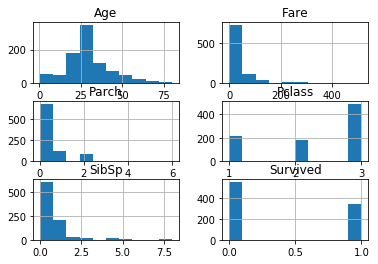

In [8]:
df.hist()

## Cambiamos la cubierta por columnas binarias

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Anteponems el prefijo cubierta a todos los valores de la columna
df["Embarked2"] = "Puerto_Origen_" + df["Embarked"]

# Realizamos un hot encoding
cubiertas = pd.get_dummies(df["Embarked2"])
print(cubiertas)
df = df.join(cubiertas)

del df['Embarked']
del df['Embarked2']

df


     Puerto_Origen_C  Puerto_Origen_Q  Puerto_Origen_S
0                  0                0                1
1                  1                0                0
2                  0                0                1
3                  0                0                1
4                  0                0                1
5                  0                1                0
6                  0                0                1
7                  0                0                1
8                  0                0                1
9                  1                0                0
10                 0                0                1
11                 0                0                1
12                 0                0                1
13                 0                0                1
14                 0                0                1
15                 0                0                1
16                 0                1                0
17        

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Puerto_Origen_C,Puerto_Origen_Q,Puerto_Origen_S
0,0,3,male,22.000000,1,0,7.2500,0,0,1
1,1,1,female,38.000000,1,0,71.2833,1,0,0
2,1,3,female,26.000000,0,0,7.9250,0,0,1
3,1,1,female,35.000000,1,0,53.1000,0,0,1
4,0,3,male,35.000000,0,0,8.0500,0,0,1
5,0,3,male,29.699118,0,0,8.4583,0,1,0
6,0,1,male,54.000000,0,0,51.8625,0,0,1
7,0,3,male,2.000000,3,1,21.0750,0,0,1
8,1,3,female,27.000000,0,2,11.1333,0,0,1
9,1,2,female,14.000000,1,0,30.0708,1,0,0


## Cambiamos la clase primero a texto, y luego a columnas binarias##

In [10]:
df['clase'] = df['Pclass'].map( { 1 : 'primera_clase' ,   2 : 'segunda_clase' , 3 : 'tercera_clase'} ).astype(str)

### Con esto generamos una columna binaria (0,1) por cada valor categorico
clases = pd.get_dummies(df["clase"])
print(clases)
del df['clase']
del df['Pclass']

df = df.join(clases)
df

     primera_clase  segunda_clase  tercera_clase
0                0              0              1
1                1              0              0
2                0              0              1
3                1              0              0
4                0              0              1
5                0              0              1
6                1              0              0
7                0              0              1
8                0              0              1
9                0              1              0
10               0              0              1
11               1              0              0
12               0              0              1
13               0              0              1
14               0              0              1
15               0              1              0
16               0              0              1
17               0              1              0
18               0              0              1
19               0  

,Survived,Sex,Age,SibSp,Parch,Fare,Puerto_Origen_C,Puerto_Origen_Q,Puerto_Origen_S,primera_clase,segunda_clase,tercera_clase
0,0,male,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,female,38.000000,1,0,71.2833,1,0,0,1,0,0
2,1,female,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,female,35.000000,1,0,53.1000,0,0,1,1,0,0
4,0,male,35.000000,0,0,8.0500,0,0,1,0,0,1
5,0,male,29.699118,0,0,8.4583,0,1,0,0,0,1
6,0,male,54.000000,0,0,51.8625,0,0,1,1,0,0
7,0,male,2.000000,3,1,21.0750,0,0,1,0,0,1
8,1,female,27.000000,0,2,11.1333,0,0,1,0,0,1
9,1,female,14.000000,1,0,30.0708,1,0,0,0,1,0


In [11]:
df['Sex2']     = df['Sex'].map( { 'male' :   1 , 'female' : 0 } ).astype(int)
df['es_hombre'] = df['Sex2']

del df['Sex']
del df['Sex2']
df

,Survived,Age,SibSp,Parch,Fare,Puerto_Origen_C,Puerto_Origen_Q,Puerto_Origen_S,primera_clase,segunda_clase,tercera_clase,es_hombre
0,0,22.000000,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,0,0,1,1
5,0,29.699118,0,0,8.4583,0,1,0,0,0,1,1
6,0,54.000000,0,0,51.8625,0,0,1,1,0,0,1
7,0,2.000000,3,1,21.0750,0,0,1,0,0,1,1
8,1,27.000000,0,2,11.1333,0,0,1,0,0,1,0
9,1,14.000000,1,0,30.0708,1,0,0,0,1,0,0


In [12]:
df.describe()


,Survived,Age,SibSp,Parch,Fare,Puerto_Origen_C,Puerto_Origen_Q,Puerto_Origen_S,primera_clase,segunda_clase,tercera_clase,es_hombre
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066,0.647587
std,0.486592,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665,0.477990
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Para igualar la magnitud de las dimensiones, podemos##

 - **Normalizar**, pasar la dimension al intervalo    [0,1]
 - **Estandardizar**, pasar la dimension al intervalo [-1,1]

In [13]:


COLUMNS_TO_NORMALIZE = ["Fare" ,'Age' ,'SibSp' , 'Parch']

for column in COLUMNS_TO_NORMALIZE : 
  df[column] = normalize (df[column].reshape(1,-1))[0]

df


,Survived,Age,SibSp,Parch,Fare,Puerto_Origen_C,Puerto_Origen_Q,Puerto_Origen_S,primera_clase,segunda_clase,tercera_clase,es_hombre
0,0,0.022735,0.027462,0.000000,0.004103,0,0,1,0,0,1,1
1,1,0.039270,0.027462,0.000000,0.040344,1,0,0,1,0,0,0
2,1,0.026869,0.000000,0.000000,0.004485,0,0,1,0,0,1,0
3,1,0.036170,0.027462,0.000000,0.030053,0,0,1,1,0,0,0
4,0,0.036170,0.000000,0.000000,0.004556,0,0,1,0,0,1,1
5,0,0.030692,0.000000,0.000000,0.004787,0,1,0,0,0,1,1
6,0,0.055805,0.000000,0.000000,0.029353,0,0,1,1,0,0,1
7,0,0.002067,0.082385,0.037582,0.011928,0,0,1,0,0,1,1
8,1,0.027903,0.000000,0.075165,0.006301,0,0,1,0,0,1,0
9,1,0.014468,0.027462,0.000000,0.017019,1,0,0,0,1,0,0


In [14]:
df.describe()


,Survived,Age,SibSp,Parch,Fare,Puerto_Origen_C,Puerto_Origen_Q,Puerto_Origen_S,primera_clase,segunda_clase,tercera_clase,es_hombre
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.030692,0.014363,0.014341,0.018227,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066,0.647587
std,0.486592,0.013437,0.030283,0.030293,0.028125,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665,0.477990
min,0.000000,0.000434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.022735,0.000000,0.000000,0.004477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.030692,0.000000,0.000000,0.008181,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.036170,0.027462,0.000000,0.017545,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,0.082674,0.219694,0.225494,0.289963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Conclusión: ##
Hemos de limpiar y normalizar los datos, para que los modelos no tengan ruido.


## Bonus: Pipelines ##

En scikit learn, hay una serie de [transformaciones](http://scikit-learn.org/stable/data_transforms.html) :

- Limpieza de datos (see Preprocessing data), 
- Reducir dimensiones
- Expandir 
- Generar dimensiones.

Esas transformaciones se encadenan, y se encapsulan en una pipeline, junto a un clasificador que entrena el dataframe resultado de las transformaciones.

PipeLine => (N * TransFormers) +  Classifier

[Ejemplo de pipeline con el dataset del titanic](https://www.kaggle.com/harrygem/titanic-pipeline-and-save-load-model/notebook)
